In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

from glob import glob

In [3]:
ls  

 Volume in drive C is Windows
 Volume Serial Number is DC25-EA40

 Directory of C:\Users\91830\FaceRecognition\Module-2

27-11-2021  00:24    <DIR>          .
27-11-2021  00:24    <DIR>          ..
25-11-2021  15:00    <DIR>          .ipynb_checkpoints
27-11-2021  00:13           129,401 f_01.png
25-11-2021  14:41         1,131,619 Module-2- 01-Image Croping.ipynb
25-11-2021  10:29           642,938 Module-2- Eigen Images.ipynb
27-11-2021  00:21         1,249,825 Module-2- image Croping.ipynb
25-11-2021  12:59           305,417 Module-2- Structuring data.ipynb
27-11-2021  00:24            15,174 Module-2-Data Preprocessing.ipynb
25-11-2021  11:31            22,175 Module-2-Training ML Model.ipynb
               7 File(s)      3,496,549 bytes
               3 Dir(s)  831,137,759,232 bytes free


In [6]:
female = glob('/Users/91830/FaceRecognition/data/crop/female_crop/*.png')
male = glob('/Users/91830/FaceRecognition/data/crop/male_crop/*.png')

In [7]:
#check for male
male

['/Users/91830/FaceRecognition/data/crop/male_crop\\male_0.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1003.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1005.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1007.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1015.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1017.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_102.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1021.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1023.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1027.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1029.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_103.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_1032.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male

In [8]:
# check for female
female

['/Users/91830/FaceRecognition/data/crop/female_crop\\female_0.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_100.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1003.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1008.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1009.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1012.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1014.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1017.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_102.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1021.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1022.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1024.png',
 '/Users/91830/FaceRecognition/data/crop/female_crop\\female_1025.png',


In [9]:
path = female + male

In [10]:
path[::-1]

['/Users/91830/FaceRecognition/data/crop/male_crop\\male_999.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_995.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_991.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_99.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_989.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_982.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_980.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_977.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_971.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_969.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_968.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_967.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_965.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_960.png',
 '/Users/91830/FaceRecognition/data/crop/male_crop\\male_959.pn

In [11]:
#getting size of image
def getsize(path):
    img = Image.open(path)
    return img.size[0]

In [12]:
getsize(path[0])

273

In [13]:
# create DataFrame
df = pd.DataFrame(data=path,columns=['path'])
df.head()

,path
0,/Users/91830/FaceRecognition/data/crop/female_...
1,/Users/91830/FaceRecognition/data/crop/female_...
2,/Users/91830/FaceRecognition/data/crop/female_...
3,/Users/91830/FaceRecognition/data/crop/female_...
4,/Users/91830/FaceRecognition/data/crop/female_...


In [14]:
df.shape

(6058, 1)

In [15]:
df['size'] = df['path'].apply(getsize)
df.head()

,path,size
0,/Users/91830/FaceRecognition/data/crop/female_...,273
1,/Users/91830/FaceRecognition/data/crop/female_...,182
2,/Users/91830/FaceRecognition/data/crop/female_...,182
3,/Users/91830/FaceRecognition/data/crop/female_...,182
4,/Users/91830/FaceRecognition/data/crop/female_...,81


In [16]:
df.tail()

,path,size
6053,/Users/91830/FaceRecognition/data/crop/male_cr...,182
6054,/Users/91830/FaceRecognition/data/crop/male_cr...,273
6055,/Users/91830/FaceRecognition/data/crop/male_cr...,182
6056,/Users/91830/FaceRecognition/data/crop/male_cr...,182
6057,/Users/91830/FaceRecognition/data/crop/male_cr...,273


### Exploratory Data Analysis

In [17]:
df.describe()

,size
count,6058.000000
mean,155.794982
std,72.361638
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

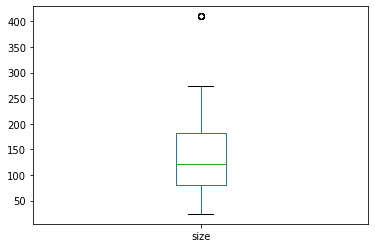

In [18]:
import seaborn as sns
df['size'].plot(kind='box')

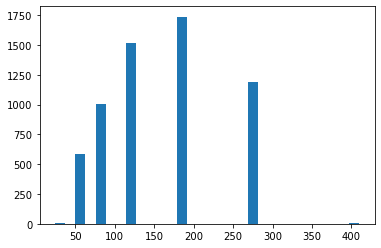

In [19]:
plt.hist(df['size'],bins=30)
plt.show()

### So, from analysis i will resize all the image in 100 x 100 form and remove with the size less or equal to 54

In [20]:
df_new= df[df['size'] > 60]
df_new

,path,size
0,/Users/91830/FaceRecognition/data/crop/female_...,273
1,/Users/91830/FaceRecognition/data/crop/female_...,182
2,/Users/91830/FaceRecognition/data/crop/female_...,182
3,/Users/91830/FaceRecognition/data/crop/female_...,182
4,/Users/91830/FaceRecognition/data/crop/female_...,81
...,...,...
6053,/Users/91830/FaceRecognition/data/crop/male_cr...,182
6054,/Users/91830/FaceRecognition/data/crop/male_cr...,273
6055,/Users/91830/FaceRecognition/data/crop/male_cr...,182
6056,/Users/91830/FaceRecognition/data/crop/male_cr...,182


In [24]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [25]:
df['gender'] = df['path'].apply(gender)

In [26]:
df['gender'].value_counts()

female    3590
male      2468
Name: gender, dtype: int64

female    0.592605
male      0.407395
Name: gender, dtype: float64


<AxesSubplot:ylabel='gender'>

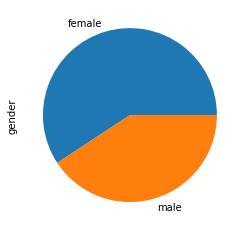

In [27]:
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts().plot(kind='pie')

<AxesSubplot:>

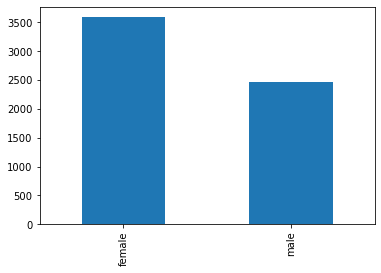

In [28]:
df['gender'].value_counts().plot(kind='bar')

1. 43% Female are there and rest 57% are male
2.All the image size is greater than or equal to 81

Conclusion : resizing all the image in df_new to 100 x 100 array

In [29]:
df_new['size'].min()

81

### Resize image

In [30]:
df.head(2)

,path,size,gender
0,/Users/91830/FaceRecognition/data/crop/female_...,273,female
1,/Users/91830/FaceRecognition/data/crop/female_...,182,female


In [31]:
path_to_resize = df['path'][0]
path_to_resize

'/Users/91830/FaceRecognition/data/crop/female_crop\\female_0.png'

In [32]:
def resize_img(path_to_resize):
    try:
        # Step-1 : read image
        img = cv2.imread(path_to_resize)
        # Step-2 : Convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Step-3 : Resize into 100 x 100 array
        size = gray.shape[0]
        if size >= 100: #Shrink
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) #SHRINK
        else:
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) #ENLARGE
                # Step-4 : Flattern Image(1x10,000)
        return gray_re.flatten()
    except:
            return None

In [33]:
# plt.imshow(gray_re,cmap='gray')

In [34]:
len(resize_img(path[0]))

10000

In [35]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

<ipython-input-35-38f68fd0a050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender
0,/Users/91830/FaceRecognition/data/crop/female_...,273,female
1,/Users/91830/FaceRecognition/data/crop/female_...,182,female
2,/Users/91830/FaceRecognition/data/crop/female_...,182,female
3,/Users/91830/FaceRecognition/data/crop/female_...,182,female
4,/Users/91830/FaceRecognition/data/crop/female_...,81,female


In [36]:
# Structuring function
df_new['structure_data'] = df_new['path'].apply(resize_img)

<ipython-input-36-8c6df7a54181>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [37]:
df_new

,path,size,gender,structure_data
0,/Users/91830/FaceRecognition/data/crop/female_...,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,/Users/91830/FaceRecognition/data/crop/female_...,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,/Users/91830/FaceRecognition/data/crop/female_...,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,/Users/91830/FaceRecognition/data/crop/female_...,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,/Users/91830/FaceRecognition/data/crop/female_...,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."
...,...,...,...,...
6053,/Users/91830/FaceRecognition/data/crop/male_cr...,182,male,"[31, 31, 31, 31, 31, 31, 31, 31, 30, 29, 29, 3..."
6054,/Users/91830/FaceRecognition/data/crop/male_cr...,273,male,"[88, 41, 33, 18, 15, 14, 13, 29, 25, 74, 114, ..."
6055,/Users/91830/FaceRecognition/data/crop/male_cr...,182,male,"[30, 30, 30, 29, 29, 29, 29, 27, 28, 28, 26, 2..."
6056,/Users/91830/FaceRecognition/data/crop/male_cr...,182,male,"[21, 27, 31, 24, 19, 24, 21, 19, 31, 36, 15, 2..."


In [38]:
# copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)
df2 = df1.astype(np.float64)
df2

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188.0,180.0,184.0,188.0,173.0,179.0,192.0,178.0,216.0,219.0,...,109.0,111.0,115.0,116.0,122.0,116.0,119.0,120.0,117.0,111.0
1,32.0,24.0,32.0,27.0,29.0,29.0,29.0,32.0,36.0,30.0,...,58.0,47.0,27.0,33.0,22.0,28.0,22.0,36.0,62.0,17.0
2,22.0,30.0,39.0,36.0,30.0,61.0,11.0,17.0,10.0,19.0,...,156.0,171.0,177.0,186.0,176.0,185.0,186.0,190.0,177.0,177.0
3,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,75.0,82.0,90.0,92.0,86.0,70.0,89.0,84.0,84.0,74.0
4,86.0,86.0,71.0,54.0,45.0,49.0,33.0,20.0,18.0,23.0,...,35.0,34.0,32.0,32.0,30.0,32.0,34.0,34.0,33.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,30.0,29.0,...,72.0,72.0,39.0,21.0,39.0,32.0,28.0,49.0,87.0,28.0
6054,88.0,41.0,33.0,18.0,15.0,14.0,13.0,29.0,25.0,74.0,...,47.0,49.0,117.0,12.0,114.0,87.0,17.0,131.0,21.0,106.0
6055,30.0,30.0,30.0,29.0,29.0,29.0,29.0,27.0,28.0,28.0,...,111.0,118.0,93.0,112.0,98.0,114.0,108.0,118.0,137.0,135.0
6056,21.0,27.0,31.0,24.0,19.0,24.0,21.0,19.0,31.0,36.0,...,22.0,14.0,11.0,16.0,16.0,19.0,23.0,20.0,22.0,25.0


In [39]:
df3 = pd.concat((df_new['gender'],df2),axis=1)

In [40]:
df3.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188.0,180.0,184.0,188.0,173.0,179.0,192.0,178.0,216.0,...,109.0,111.0,115.0,116.0,122.0,116.0,119.0,120.0,117.0,111.0
1,female,32.0,24.0,32.0,27.0,29.0,29.0,29.0,32.0,36.0,...,58.0,47.0,27.0,33.0,22.0,28.0,22.0,36.0,62.0,17.0
2,female,22.0,30.0,39.0,36.0,30.0,61.0,11.0,17.0,10.0,...,156.0,171.0,177.0,186.0,176.0,185.0,186.0,190.0,177.0,177.0
3,female,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,75.0,82.0,90.0,92.0,86.0,70.0,89.0,84.0,84.0,74.0
4,female,86.0,86.0,71.0,54.0,45.0,49.0,33.0,20.0,18.0,...,35.0,34.0,32.0,32.0,30.0,32.0,34.0,34.0,33.0,30.0


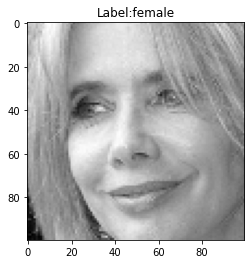

In [41]:
plt.imshow(df3.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label:"+ df3.loc[0]['gender'])
plt.show()

In [42]:
import pickle

In [44]:
pickle.dump(df3,open('/Users/91830/FaceRecognition/data/dataframe_images_100_100.pickle','wb'))